# 3. Clasificación

En este capítulo, utilizaremos el conjunto de datos MNIST, que consta de 70,000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de los EE. UU. Cada imagen está etiquetada con el dígito que representa. Este conjunto ha sido estudiado tanto que a menudo se le llama el "Hola Mundo" del Aprendizaje Automático: cada vez que alguien desarrolla un nuevo algoritmo de clasificación, siente curiosidad por ver cómo se desempeñará en MNIST, y cualquiera que aprenda Aprendizaje Automático trabaja con este conjunto de datos tarde o temprano.

Scikit-Learn proporciona muchas funciones auxiliares para descargar conjuntos de datos populares, y MNIST es uno de ellos. El siguiente código obtiene el conjunto de datos MNIST:

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Los conjuntos de datos cargados por Scikit-Learn generalmente tienen una estructura de diccionario similar, que incluye lo siguiente:

Una clave DESCR que describe el conjunto de datos.
Una clave data que contiene un arreglo con una fila por instancia y una columna por característica.
Una clave target que contiene un arreglo con las etiquetas.
Veamos estos arreglos

In [2]:
X, y = mnist["data"], mnist["target"]
X = np.array(X, dtype=np.float32)
X.shape #Cantidad de imágenes y características
#característica es la intensidad de un píxel 
#784 por la cantidad de píxeles, blanco a negro

(70000, 784)

In [3]:
y.shape # Cantidad de imágenes 

(70000,)

In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
#some_digit_image

Hay 70,000 imágenes, y cada imagen tiene 784 características. Esto se debe a que cada imagen tiene un tamaño de 28 × 28 píxeles, y cada característica simplemente representa la intensidad de un píxel, con valores desde 0 (blanco) hasta 255 (negro).

Echemos un vistazo a un dígito del conjunto de datos. Todo lo que necesitas hacer es tomar el vector de características de una instancia, redimensionarlo a una matriz de 28 × 28 y mostrarlo utilizando la función imshow() de Matplotlib:

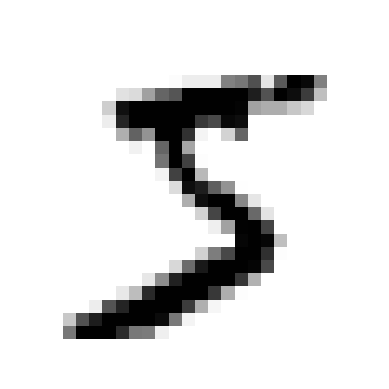

In [6]:
import matplotlib.pyplot as plt
some_digit = X[0] # X[0] selecciona la primera imagen del conjunto de datos.
# some_digit ahora es un arreglo de 784 valores
some_digit_image = some_digit.reshape(28, 28) #Convertir el vector en una matriz de 28 × 28
# donde cada valor representa la intensidad del píxel (0 = blanco, 255 = negro).
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y[0]

'5'

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Nota que la etiqueta es una cadena de texto. La mayoría de los algoritmos de aprendizaje automático esperan números, así que convertimos y "y" a entero:



In [9]:
y = y.astype(np.uint8)


Para darte una idea de la complejidad de la tarea de clasificación, la Figura 3-1 muestra algunas imágenes adicionales del conjunto de datos MNIST.

Figura 3-1. Dígitos del conjunto de datos MNIST

¡Pero espera! Siempre debes crear un conjunto de prueba y reservarlo antes de inspeccionar los datos de cerca. El conjunto de datos MNIST ya está dividido en un conjunto de entrenamiento (las primeras 60,000 imágenes) y un conjunto de prueba (las últimas 10,000 imágenes):

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

El conjunto de entrenamiento ya está mezclado, lo cual es beneficioso porque garantiza que todos los pliegues en la validación cruzada sean similares (no quieres que un pliegue se quede sin algunos dígitos). Además, algunos algoritmos de aprendizaje son sensibles al orden de las instancias de entrenamiento y tienen un rendimiento deficiente si reciben muchas instancias similares seguidas. Mezclar el conjunto de datos asegura que esto no suceda.

### 3.1 Entrenando un Clasificador Binario

Simplifiquemos el problema por ahora e intentemos identificar solo un dígito, por ejemplo, el número 5. Este “detector de 5” será un ejemplo de un clasificador binario, capaz de distinguir entre solo dos clases: 5 y no-5. Creemos los vectores objetivo para esta tarea de clasificación:

In [11]:
y_train_5 = (y_train == 5)  # True para todos los 5, False para todos los demás dígitos  
y_test_5 = (y_test == 5)

Ahora elijamos un clasificador y entrenémoslo. Un buen punto de partida es un clasificador de Descenso de Gradiente Estocástico (SGD, por sus siglas en inglés), utilizando la clase SGDClassifier de Scikit-Learn.

Este clasificador tiene la ventaja de manejar de manera eficiente conjuntos de datos muy grandes. Esto se debe, en parte, a que el SGD procesa las instancias de entrenamiento de manera independiente, una por una (lo que también lo hace adecuado para el aprendizaje en línea), como veremos más adelante.

Creemos un SGDClassifier y entrenémoslo con todo el conjunto de entrenamiento:

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

El SGDClassifier depende del azar durante el entrenamiento (de ahí el nombre "estocástico"). Si deseas obtener resultados reproducibles, debes establecer el parámetro random_state.

Ahora podemos usarlo para detectar imágenes del número 5:


In [13]:
sgd_clf.predict([some_digit])

array([ True])

El clasificador predice que esta imagen representa un 5 (True). ¡Parece que acertó en este caso!

$$\textbf{Este es un ejemplo pero ahora con 8.}$$

In [14]:
y_train_8 = (y_train == 8)  # True para todos los 5, False para todos los demás dígitos  
y_test_8 = (y_test == 8)

In [15]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([X[17]])

array([ True])

## 3.2 Matriz de Confusión

Una forma mucho mejor de evaluar el desempeño de un clasificador es observar la matriz de confusión. La idea general es contar cuántas veces las instancias de la clase A fueron clasificadas como clase B.

Por ejemplo, si quieres saber cuántas veces el clasificador confundió imágenes de 5 con 3, debes observar la fila 5 y la columna 3 en la matriz de confusión.

Para calcular la matriz de confusión, primero necesitas obtener un conjunto de predicciones para compararlas con las etiquetas reales. Podrías hacer predicciones en el conjunto de prueba, pero por ahora lo dejaremos intacto (recuerda que solo debes usarlo al final del proyecto, cuando ya tengas un clasificador listo para lanzar).

En su lugar, puedes usar la función cross_val_predict():

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Al igual que cross_val_score(), la función cross_val_predict() realiza una validación cruzada con K pliegues, pero en lugar de devolver las puntuaciones de evaluación, devuelve las predicciones hechas en cada pliegue de prueba.

Esto significa que obtienes una predicción limpia para cada instancia en el conjunto de entrenamiento (es decir, una predicción hecha por un modelo que nunca vio esos datos durante el entrenamiento).

Ahora puedes calcular la matriz de confusión con la función confusion_matrix(), pasándole las etiquetas reales (y_train_5) y las predicciones (y_train_pred):



In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52533,  2046],
       [  991,  4430]])

Cada fila de la matriz de confusión representa una clase real, mientras que cada columna representa una clase predicha:

Primera fila (no-5s, clase negativa):

53,057 imágenes fueron clasificadas correctamente como no-5 (verdaderos negativos).
1,522 imágenes fueron clasificadas erróneamente como 5s (falsos positivos).

Segunda fila (5s, clase positiva):

1,325 imágenes de 5 fueron clasificadas erróneamente como no-5 (falsos negativos).
4,096 imágenes de 5 fueron correctamente clasificadas (verdaderos positivos).
Un clasificador perfecto solo tendría verdaderos positivos y verdaderos negativos, por lo que su matriz de confusión solo tendría valores distintos de cero en la diagonal principal (de la esquina superior izquierda a la inferior derecha):

In [19]:
y_train_perfect_predictions = y_train_5  # supongamos que logramos la perfección
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

Métricas Derivadas de la Matriz de Confusión
La matriz de confusión proporciona mucha información, pero a veces es mejor utilizar una métrica más concisa.

Una métrica interesante es la precisión (precision), que mide la exactitud de las predicciones positivas. Se calcula con la siguiente fórmula:


$$
\text{Precisión} = \frac{TP}{TP + FP}
$$


Donde:

TP (True Positives): Número de verdaderos positivos.
FP (False Positives): Número de falsos positivos.
Un método trivial para obtener precisión perfecta sería hacer una sola predicción positiva y asegurarse de que sea correcta (1/1 = 100%). Sin embargo, este método no sería útil porque ignoraría casi todas las instancias positivas.

Por esta razón, la precisión se usa junto con otra métrica llamada recall (sensibilidad o tasa de verdaderos positivos, TPR), que mide la proporción de instancias positivas detectadas correctamente por el clasificador:


$$
\text{Recall} = \frac{TP}{TP + FN}
$$

## 3.3 Precision and Recall

Scikit-Learn proporciona varias funciones para calcular métricas de clasificación, incluyendo precisión y recall:

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)
# Resultado: 0.7290850836596654

0.6840642371834466

In [21]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)
# Resultado: 0.7555801512636044

0.8171923999262128

Ahora, tu detector de "5" no parece tan impresionante como cuando solo observabas su precisión. Cuando el clasificador predice que una imagen representa un "5", solo acierta el 72.9% de las veces. Además, solo detecta el 75.6% de los "5" presentes en los datos.

A menudo, es útil combinar precisión y recall en una sola métrica llamada puntuación F1 (F1 score), especialmente si necesitas una forma sencilla de comparar dos clasificadores. La puntuación F1 es la media armónica entre precisión y recall (Ecuación 3-3). A diferencia de la media aritmética, que trata todos los valores por igual, la media armónica da mayor peso a los valores más bajos. Como resultado, el clasificador solo obtendrá un F1 alto si tanto la precisión como el recall son elevados.

Para calcular la puntuación F1, simplemente usa la función f1_score():

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
# Resultado: 0.7420962043663375


0.7447255610658149

La puntuación F1 favorece clasificadores que tienen valores similares de precisión y recall. Sin embargo, esto no siempre es deseable: en algunos contextos, es más importante la precisión, mientras que en otros lo crucial es el recall.

Por ejemplo, si entrenas un clasificador para detectar videos aptos para niños, probablemente prefieras un modelo con alta precisión y baja recall, es decir, que rechace muchos videos buenos pero asegure que los que acepta sean completamente seguros. En este caso, sería mejor un clasificador estricto, e incluso podrías incluir una revisión humana adicional.

Por otro lado, si entrenas un clasificador para detectar ladrones en imágenes de vigilancia, lo importante es maximizar el recall. Es aceptable que el modelo tenga solo un 30% de precisión, siempre que tenga 99% de recall. Es decir, aunque haya muchas alertas falsas, casi todos los ladrones serán detectados.

Desafortunadamente, no puedes optimizar precisión y recall simultáneamente: aumentar la precisión reduce el recall y viceversa. Este fenómeno se conoce como el compromiso entre precisión y recall (precision/recall trade-off).

## 3.4 Precision/Recall Trade-off

Para cada instancia, calcula una puntuación basada en una función de decisión. Si esa puntuación es mayor que un umbral, asigna la instancia a la clase positiva; de lo contrario, la asigna a la clase negativa. La Figura 3-3 muestra algunos dígitos ordenados de izquierda a derecha, desde la puntuación más baja hasta la más alta. Supongamos que el umbral de decisión está ubicado en la flecha central (entre los dos 5): encontrarías 4 verdaderos positivos (5s reales) a la derecha de ese umbral y 1 falso positivo (realmente un 6). Por lo tanto, con ese umbral, la precisión es 80% (4 de 5). Pero de 6 verdaderos 5, el clasificador solo detecta 4, así que el recall es 67% (4 de 6). Si aumentas el umbral (lo mueves a la flecha de la derecha), el falso positivo (el 6) se convierte en un verdadero negativo, aumentando así la precisión (hasta el 100% en este caso), pero uno de los verdaderos positivos se convierte en un falso negativo, reduciendo el recall hasta un 50%. Por el contrario, reducir el umbral aumenta el recall y reduce la precisión.

Scikit-Learn no te permite establecer el umbral directamente, pero sí te da acceso a las puntuaciones de decisión que usa para hacer predicciones. En lugar de llamar al método predict() del clasificador, puedes llamar a su método decision_function(), que devuelve una puntuación para cada instancia, y luego usar cualquier umbral que desees para hacer predicciones basadas en esas puntuaciones:



In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores 
#Si score >= 0 → predice la clase positiva.
#Si score < 0 → predice la clase negativa.
# Resultado: array([2412.53175101])

array([-13270.82878946])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# Resultado: array([ True])

array([False])

El SGDClassifier usa un umbral igual a 0, por lo que el código anterior devuelve el mismo resultado que el método predict() (es decir, True). Vamos a aumentar el umbral:

In [25]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# Resultado: array([False])


array([False])

Esto confirma que aumentar el umbral reduce el recall. La imagen realmente representa un 5, y el clasificador lo detecta cuando el umbral es 0, pero lo pierde cuando el umbral se aumenta a 8,000.

¿Cómo decides qué umbral usar? Primero, usa la función cross_val_predict() para obtener las puntuaciones de todas las instancias en el conjunto de entrenamiento, pero esta vez especifica que deseas devolver las puntuaciones de decisión en lugar de las predicciones:

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


Con estas puntuaciones, usa la función precision_recall_curve() para calcular precisión y recall para todos los posibles umbrales:

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


Finalmente, usa Matplotlib para trazar precisión y recall en función del valor del umbral (Figura 3-4):

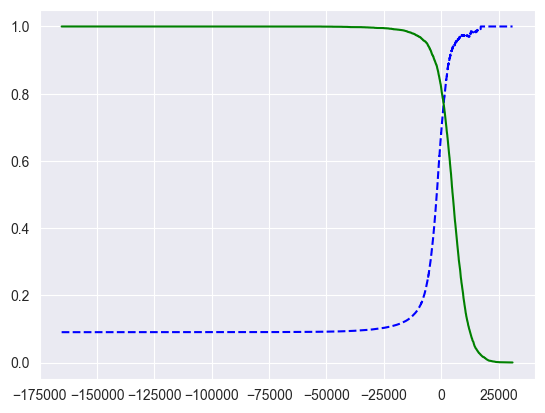

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
   
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Otra forma de seleccionar un buen compromiso entre precisión y recall es trazar precisión directamente contra recall, como se muestra en la Figura 3-5 (el mismo umbral de antes está resaltado). Puedes ver que la precisión comienza a caer bruscamente alrededor del 80% de recall. Probablemente querrás seleccionar un compromiso de precisión/recall justo antes de esa caída, por ejemplo, alrededor del 60% de recall. Pero, por supuesto, la elección depende de tu proyecto.

Supongamos que decides apuntar a 90% de precisión. Mirando el primer gráfico, encuentras que necesitas usar un umbral de aproximadamente 8,000. Para ser más preciso, puedes buscar el umbral más bajo que te dé al menos 90% de precisión (np.argmax() te dará el primer índice del valor máximo, lo que en este caso significa el primer valor True):



In [29]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816
threshold_90_precision

3533.1796673415824

Para hacer predicciones (por ahora en el conjunto de entrenamiento), en lugar de llamar al método predict() del clasificador, puedes ejecutar este código:

In [30]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Comprobemos la precisión y el recall de estas predicciones:


In [31]:
precision_score(y_train_5, y_train_pred_90)
# Resultado: 0.9000380083618396


0.9001888319395738

In [32]:
recall_score(y_train_5, y_train_pred_90)
# Resultado: 0.4368197749492714

0.6155690831949825

## 3.5 La curva Roc

La curva Receiver Operating Characteristic (ROC) es otra herramienta comúnmente utilizada con clasificadores binarios. Es muy similar a la curva de precisión/recuperación, pero en lugar de graficar la precisión contra la recuperación, la curva ROC grafica la tasa de verdaderos positivos (otra forma de llamar a la recuperación) contra la tasa de falsos positivos (FPR).

La FPR es la proporción de instancias negativas que fueron clasificadas incorrectamente como positivas. Es igual a 1 - la tasa de verdaderos negativos (TNR), que es la proporción de instancias negativas correctamente clasificadas como negativas. La TNR también se llama especificidad. Por lo tanto, la curva ROC grafica sensibilidad (recuperación) contra 1 - especificidad.

Para trazar la curva ROC, primero usamos la función roc_curve() para calcular la TPR y FPR en varios valores de umbral:

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [34]:
roc_curve(y_train_5, y_scores)

(array([0.        , 0.        , 0.        , ..., 0.99356896, 0.99356896,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 2.30584763e-02, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([             inf,   31110.55957728,   17202.55530069, ...,
         -65417.90136022,  -65440.43651647, -165409.93651647]))

Luego, podemos graficar la FPR contra la TPR usando Matplotlib. Este código genera la gráfica:

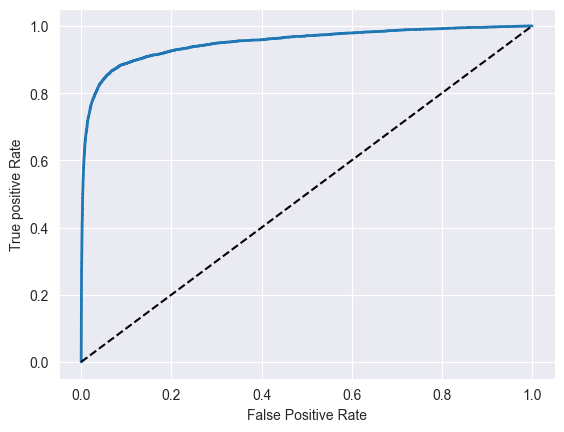

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal discontinua
    [...]  # Agregar etiquetas a los ejes y la cuadrícula
plot_roc_curve(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.show()


Nuevamente, hay un compromiso: a mayor recuperación (TPR), más falsos positivos (FPR) produce el clasificador. La línea punteada representa la curva ROC de un clasificador completamente aleatorio; un buen clasificador se aleja lo más posible de esa línea (hacia la esquina superior izquierda).

Área bajo la curva (AUC) ROC
Una forma de comparar clasificadores es medir el área bajo la curva ROC (AUC).

Un clasificador perfecto tendrá un AUC de 1.
Un clasificador aleatorio tendrá un AUC de 0.5.
Scikit-Learn proporciona la función roc_auc_score() para calcularlo:

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9506700784170535

Si la clase positiva es rara o te importan más los falsos positivos que los falsos negativos, usa la curva PR (precisión/recuperación). De lo contrario, usa la curva ROC.

Por ejemplo, viendo la curva ROC anterior y su AUC, podríamos pensar que el clasificador es excelente. Sin embargo, esto se debe a que hay pocos positivos (5s) en comparación con los negativos (no-5s). En cambio, la curva PR deja más claro que el clasificador aún puede mejorar.

Comparación con un RandomForestClassifier
Ahora entrenemos un RandomForestClassifier y comparemos su curva ROC y su AUC con las del SGDClassifier.
Debido a su funcionamiento, RandomForestClassifier no tiene un método decision_function(), sino predict_proba(), que devuelve una matriz con la probabilidad de cada clase:

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")


La función roc_curve() espera etiquetas y puntuaciones. En este caso, usamos la probabilidad de la clase positiva como puntuación:

In [38]:
y_scores_forest = y_probas_forest[:, 1]  # Probabilidad de ser un "5"
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


Ahora graficamos la curva ROC del RandomForestClassifier junto con la del SGDClassifier:

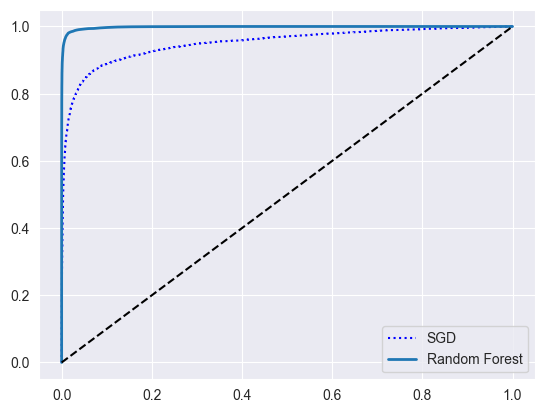

In [39]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


La curva ROC del RandomForestClassifier se acerca mucho más a la esquina superior izquierda, lo que indica mejor desempeño. Su AUC también es significativamente mejor:

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983296721818179